# Project: WE RATE DOGS ANALYZATION  AND VISUALIZATION.

In [1]:
#Libaries i will be using
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import os
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from nltk import pos_tag
from timeit import default_timer as timer

In [ ]:
# The data i will be using for this projec is
# The twitter_archive_enchanced.csv which was downloaded from the WeRateDogs twitter archive data from twitter provided by Udacity
# The tweet image prediction (image_predictions.tsv)
#Then the last one is the Twitter API (tweet_json.txt)

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# this is the twitter_archive_enhanced.csv
tweets_df = pd.read_csv('twitter-archive-enhanced.csv')
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# this is to check the number of rows and columns i will be working with in this data set
tweets_df.shape

(2356, 17)

In [4]:
# to peep into the data set,to see an information about any dog i will be checking one of the rows using df.iloc
test_tweets = tweets_df.iloc[9]
test_tweets

tweet_id                                                     890240255349198849
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-26 15:59:51 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Cassie. She is a college pup. Studying...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/890240255...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# For the image prediction
folder_name = 'image_predictons'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
# i will download the tweet image prediction which is a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

# this is to show that the HTTP request was successful

<Response [200]>

In [7]:
# to create a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
# to import the image prediction TSV file 
image_pred_df = pd.read_csv('image-predictions.tsv', sep= '\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# this is to check the number of rows and columns i will be working with in this data set
image_pred_df.shape

(2075, 12)

In [9]:
# to see more information about this dataset
image_pred_df.info
# the tweet_id's are the https files for each image of a dog

<bound method DataFrame.info of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322150

In [10]:
# to peep into the data set,to see an information about any dog i will be checking one of the rows using df.iloc
image_pred_df.iloc[2]


tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

# 3. Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
df=[]
with open('tweet-json.txt')as file:
    for line in file:
        df.append(json.loads(line))

In [12]:
tweet_json = pd.DataFrame(df,columns=['id', 'retweet_count', 'favorite_count'])

In [13]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
# to change column name from id to tweeter id
tweet_json.rename(columns = {'id':'tweet_id'}, inplace = True)

In [15]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [16]:
# i will first asses the tweets_df dataset
tweets_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
# to asses the data programmaticaly
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
tweets_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
tweets_df['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351

In [ ]:
# For the image_prediction

In [20]:
image_pred_df.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
849,695629776980148225,https://pbs.twimg.com/media/Cadfl6zWcAEZqIW.jpg,1,Old_English_sheepdog,0.693857,True,otterhound,0.232117,True,West_Highland_white_terrier,0.012867,True
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
1516,786963064373534720,https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg,1,golden_retriever,0.915303,True,Saluki,0.046213,True,Labrador_retriever,0.037504,True


In [21]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_pred_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [23]:
image_pred_df['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
chow                               20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [ ]:
# For Twitter API

In [24]:
tweet_json.sample(7)

,tweet_id,retweet_count,favorite_count
793,773336787167145985,5912,0
1393,699801817392291840,1088,3345
411,822975315408461824,3958,19139
1832,676121918416756736,1297,2335
993,748346686624440324,1413,5735
1111,733109485275860992,17621,44619
580,800443802682937345,5068,0


In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
tweet_json.sort_values(['favorite_count'], ascending=False) 

,tweet_id,retweet_count,favorite_count
412,822872901745569793,48265,132810
1037,744234799360020481,79515,131075
65,879415818425184262,45849,107956
533,807106840509214720,56625,107015
134,866450705531457537,32883,106827
448,819004803107983360,42228,95450
114,870374049280663552,27680,85011
536,806629075125202948,37911,75639
168,859196978902773760,25661,75193
1077,739238157791694849,52360,75163


# Quality Issues

1. There are some incorrect datatypes on tweet_id and time stamps
2. There are 181 entries in (retweeted_status_id, reweeted_status_user and reweeted_status_timestamp) instead of 2356 entries 
3. There are 78 entries in (reply_to_status_id and reply_to_user_id) making it to have about 2278 missing entries.
4. The expanded_urls has some missing values too. It had just 2297 entries instead of 2356 
5. Some of the breeds of the dogs are not properly capitalized in p1, p2 and p3. 
6. Some of the tweets are retweeted, making must of them not original tweets
7. Some of the tweets has missing images 
8. Both the rating_numerator and rating_denorminator have incorrect ratings
9. Some of the tweets in the name column  are not valid names.


# Tidiness Issues

1. The three different data set had one (1) common column, which is "tweet_id" they all need to be merged and put in just one dataset.
2.  There are four different columns for dog names (doggo, floofer, pupper and puppo) and  they ought to be put in a single column.

## Cleaning Data
In this section, i will clean **all** of the issues i documented while assessing. 

 Make a copy of the original data before cleaning, which includes merging individual pieces of data.

In [28]:
# Make copies of original pieces of data
tweets_df_clean = tweets_df.copy()
image_pred_df_clean = image_pred_df.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:

# Define: merging individual pieces of data.

#### Code 

In [29]:
# Merge all the three dataframes(tweets_df_clean, image_pred_df_clean, tweet_json_clean)  on tweet_id 

df_merge = pd.merge(tweets_df_clean, image_pred_df_clean,on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, tweet_json_clean,on='tweet_id', how='inner')

#### Test

In [30]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

### Issue #2:

#### Define:  Remove columns that are not needed

#### Code

In [32]:
# Drop retweets by filtering out the NAN values of retweeted_status_user_id
df_merge = df_merge[pd.isnull(df_merge['retweeted_status_user_id'])]
#drop tweets with no pictures
df_merge = df_merge.dropna(subset = ['jpg_url'])
#drop duplicated tweet_id
df_merge = df_merge.drop_duplicates()

#### Test

In [33]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

In [34]:
#i will be dropping this other columns 
df_merge = df_merge.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'retweeted_status_id',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',], axis=1)

In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null obj

# issue #3

Define: The four different coloumns for dog names (doggo,floofer,pupper,puppo) will be put in a single coloumn

# code

In [36]:
# Merge doggo, floofer, pupper and puppo columns into a new column called  'dog_stage' 
df_merge['dog_stage'] = df_merge['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [37]:
# since i am extracting them, and putting them in a column called 'dog_stage' , i will be dropping the  columns
df_merge = df_merge.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

# Text

In [38]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64

# issue #4

# Define: Dog breeds that are not properly capitalized in p1, p2 and p3
After making them all lower cases, i will merge them into one single column called "dog_breed" then, drop p1,p2, and p3 columns.

# Code

In [39]:
# changing them to  lower cases
df_merge['p1'] = df_merge['p1'].str.lower()
df_merge['p2'] = df_merge['p2'].str.lower()
df_merge['p3'] = df_merge['p3'].str.lower()

# Test

In [40]:
df_merge.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
555,787397959788929025,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1,...,True,toy_terrier,0.021084,True,miniature_pinscher,0.019484,True,3300,12120,NaN
362,818536468981415936,2017-01-09 19:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tom. He's a silly dog. Known for his u...,https://twitter.com/dog_rates/status/818536468...,11,10,Tom,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,...,False,welsh_springer_spaniel,0.000062,True,bow,0.000030,False,2873,12127,NaN
774,752334515931054080,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,https://twitter.com/dog_rates/status/752334515...,8,10,None,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,...,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True,1263,4238,doggo
1729,672264251789176834,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He has the eyes of a tyrannical ...,https://twitter.com/dog_rates/status/672264251...,10,10,Kreg,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,...,True,teddy,0.068134,False,norwich_terrier,0.059227,True,383,1212,NaN
378,816336735214911488,2017-01-03 17:33:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dudley. He found a flower and now he's...,https://twitter.com/dog_rates/status/816336735...,11,10,Dudley,https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg,1,...,True,kuvasz,0.049480,True,golden_retriever,0.011934,True,2269,9564,NaN
750,756526248105566208,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All hail sky doggo. 13/10 would jump super hig...,https://twitter.com/dog_rates/status/756526248...,13,10,None,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,...,False,volcano,0.004673,False,fountain,0.001234,False,4169,11506,doggo
1897,669037058363662336,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,https://twitter.com/dog_rates/status/669037058...,10,10,None,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,...,True,pomeranian,0.053871,True,chow,0.032257,True,336,698,NaN
1382,684195085588783105,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,...,True,toy_terrier,0.121809,True,boston_bull,0.095981,True,595,2108,NaN


# Issue #5

# Define
Delecting some of the missing information in image prediction

# Code

In [41]:
df_merge = df_merge.drop(['img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],1)

# Test

In [42]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p2                    1994 non-null object
p3                    1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dog_stage             326 non-null object
dtypes: int64(5), object(10)
memory usage: 249.2+ KB


# Issue #6

# Define : incorrect data types in tweet_id and timestamps
tweet_id is suppose to be a string not n integer and timestamps is might to be an datetime object for better understanding

# code

In [43]:
# for the tweet_id
df_merge['tweet_id']= df_merge['tweet_id'].astype(str)
# for the timestamps
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'])

# test

In [44]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p2                    1994 non-null object
p3                    1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dog_stage             326 non-null object
dtypes: datetime64[ns](1), int64(4), object(10)
memory usage: 249.2+ KB


# Issue#7

# Define :
Some of the tweets in the name coloumn are not valid name. So, i will replace all the invalid names with 'NaN'

# code

In [45]:
names_dogs = df_merge.name.str.contains('^[a-z]', regex = True)
df_merge[names_dogs].name.value_counts().sort_index()

a               55
actually         1
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
light            1
my               1
not              1
officially       1
one              4
quite            3
space            1
such             1
the              7
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [46]:
df_merge.loc[names_dogs, 'name'] = "NaN"

# Test

In [47]:
df_merge[names_dogs].name.value_counts().sort_index()

NaN    98
Name: name, dtype: int64

In [48]:
# Checking the names 
df_merge.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

# Issue#8

# Define:
    The rating_numerator and rating_denorminator both have incorrect ratings.

In [49]:
# will have to update the values
df_merge.loc[(df_merge.tweet_id== 883482846933004288), 'rating_numerator'] = 13.5
df_merge.loc[(df_merge.tweet_id== 786709082849828864), 'rating_numerator'] = 9.75
df_merge.loc[(df_merge.tweet_id== 778027034220126208), 'rating_numerator'] = 11.27
df_merge.loc[(df_merge.tweet_id== 680494726643068929), 'rating_numerator'] = 11.26

# Test

In [50]:
df_merge[df_merge.text.str.contains(r'(\d+\.\d*\/\d+)')][['text','rating_numerator','rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
40,This is Bella. She hopes her smile made you sm...,5.0,10
558,"This is Logan, the Chow who lived. He solemnly...",75.0,10
614,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10
1451,Here we have uncovered an entire battalion of ...,26.0,10


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
df_merge.to_csv('twitter_archive_master.csv')

In [52]:
df_merge.to_csv('twitter_archive_master.csv', index=False)

# Analyzing Data

In [53]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p2,p3,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,pekinese,papillon,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,malamute,kelpie,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,labrador_retriever,spatula,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,english_springer,german_short-haired_pointer,9774,41048,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,irish_terrier,indian_elephant,3261,20562,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,border_collie,ice_lolly,2158,12041,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,eskimo_dog,pembroke,16716,56848,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,irish_setter,chesapeake_bay_retriever,4429,28226,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,cardigan,chihuahua,7711,32467,doggo


In [54]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1896 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p2                    1994 non-null object
p3                    1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dog_stage             326 non-null object
dtypes: float64(1), int64(4), object(10)
memory usage: 233.8+ KB


In [55]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000


In [56]:
# I will check for the most used tweeter source
df_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
# from this report it obvious that most of the tweet that were recieved was more from an iPhone

In [58]:
#checking for the most popular dog names
df_master['name'].value_counts()

None         546
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Jax            6
Koda           6
Bella          6
Stanley        6
Bo             6
Leo            5
Milo           5
Buddy          5
Rusty          5
Scout          5
Bailey         5
Dave           5
Louis          5
Chester        5
Oscar          5
Clarence       4
Phil           4
Bentley        4
            ... 
Juckson        1
Brandy         1
Bloop          1
Grizzie        1
Sparky         1
Acro           1
Richie         1
Goose          1
Maya           1
Luther         1
Rambo          1
Rhino          1
Scruffers      1
Coleman        1
Toffee         1
Siba           1
Lacy           1
Beebop         1
Wiggles        1
Jockson        1
Laika          1
Crimson        1
Butter         1
Mattie         1
Jo             1
Dixie          1
Rizzy          1
Jackie        

In [ ]:
# from this dataset, 546 name where recorded as 'None' but the most popular name that was recorded after that was 'Charlie'

In [59]:
# Checking for the most tweeted dog stage
df_merge['dog_stage'].value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

In [ ]:
# pupper is the most tweeted dog stage

In [60]:
# checking for the most tweeted breed using p1
df_master['p1'].value_counts()

golden_retriever             139
labrador_retriever            95
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       40
toy_poodle                    38
pomeranian                    38
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     19
shetland_sheepdog             18
eskimo_dog                    18
maltese_dog                   18
teddy                         18
shih-tzu                      17
cardigan                      17
rottweiler                    17
beagle                        17
kuvasz                        16
lakeland_terrier              16
italian_greyhound             16
web_site                      15
          

In [ ]:
# the 'golden_retriever' was the most tweeted dog breed from p1

# Visualizing the Data

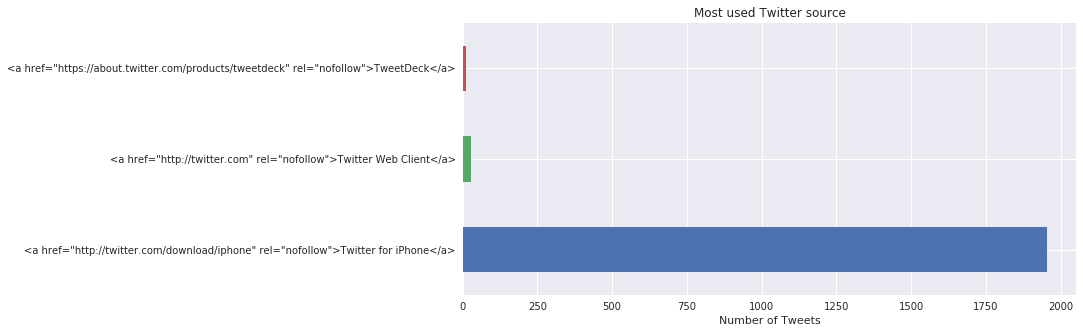

In [61]:
# to see more details about the most used source
df_master['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

In [ ]:
#iPhone was the most used source..it was used 1955 times in this dataset

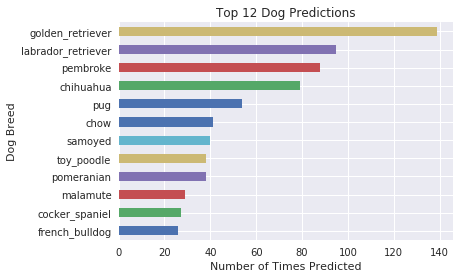

In [62]:
# i will be ploting  a bar chat for top 12 dog breeds
df_master['p1'].value_counts()[11::-1].plot(kind='barh')
plt.title('Top 12 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 14

In [ ]:
#from this bar, 'golden_retriever' was more predicted followed by 'labrador_retriever'. Then the list was 'french_bulldog'

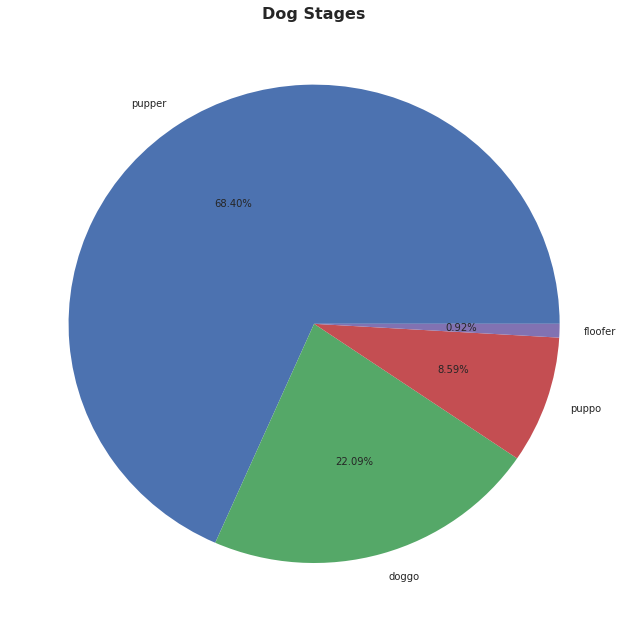

In [63]:
# i will be plotting a  Pie chart for the dog stage counts
df_master['dog_stage'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(11,11))

plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=16);

In [ ]:
# pupper had the highest count with 69.40% in dog stages followed by doggo with 22.09%. The least dog stage count was floofer.

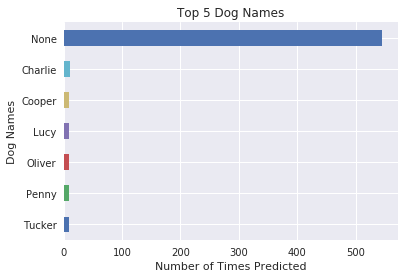

In [64]:
# i will be ploting  a bar chat for top 5 dog names
df_master['name'].value_counts()[6::-1].plot(kind='barh')
plt.title('Top 5 Dog Names')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Names')
plt.fontsize = 14

In [ ]:
# None has the highest value on this dataset and it doesn"t tell us the namesof the dog, so i will disregard it. But Charlie is the most common dog nameon this dataset

In [ ]:
# Am checking the relationship between Retweet counts and Favorite count

Text(63.125,0.5,'Favorite Counts')

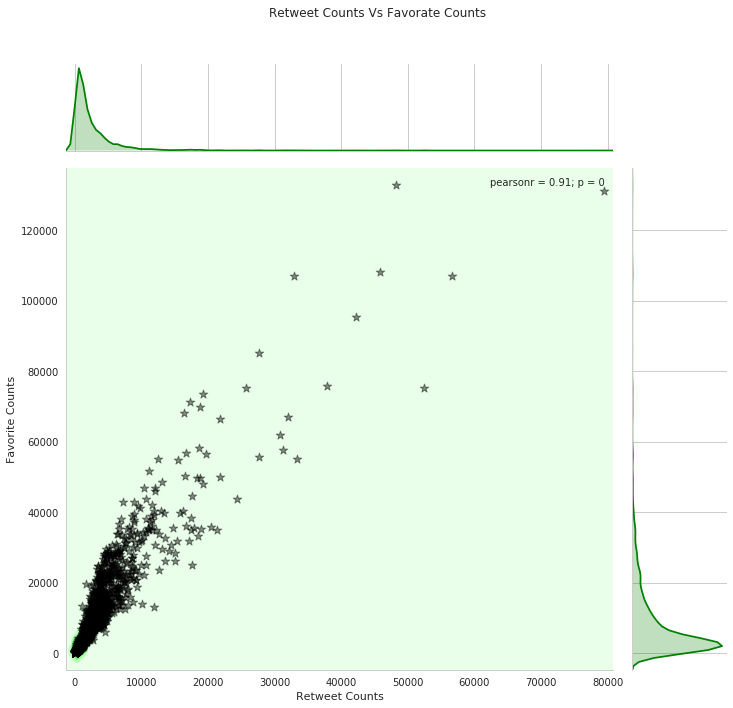

In [65]:
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_master, 
                  color="green",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="*",
             alpha=0.45)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('Retweet Counts Vs Favorate Counts', Fontsize =16);
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')

In [ ]:
# this shows a positive correlation between Retweet counts and Favorite count. it also tells us that the more retweets on a particular dog, tje more it becomes the public's favorite.

### Insights:
1. The most common source used was from an iPhone

2. The most popular dog name is Charlie

3. The most tweeted dog stage is pupper

4. There is a positive correlation between reweets and favorite counts